EDA Feature Analysis
Goal:

→ Analyze engineered features (AQI, derived, time-based)
→ detect redundant or low-importance ones
→ finalize feature set before upload to Hopsworks

In [3]:
# Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the engineered dataset
file_path = "../data/final/final_features.csv"
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Data loaded successfully!
Shape: (17952, 40)


,datetime,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,wind_speed_10m,...,aqi_roll_mean_3h,aqi_roll_mean_6h,aqi_rolling_24h,aqi_lag_1h,aqi_lag_3h,aqi_lag_6h,pm_ratio,temp_humidity_ratio,wind_effect,high_pollution_flag
0,2024-01-01 00:00:00,68.9,46.2,598.0,6.7,97.0,19.9,15.3,65,11.9,...,127.000000,127.000000,127.000000,127.0,127.0,127.0,0.670537,0.235385,5.769234,0
1,2024-01-01 01:00:00,70.1,47.1,689.0,14.8,89.0,20.4,14.9,67,12.4,...,128.500000,128.500000,128.500000,127.0,127.0,127.0,0.671897,0.222388,6.200000,0
2,2024-01-01 02:00:00,72.6,49.1,812.0,25.8,78.0,21.2,14.6,68,12.6,...,130.333333,130.333333,130.333333,130.0,127.0,127.0,0.676309,0.214706,6.489480,0
3,2024-01-01 03:00:00,76.1,51.8,887.0,31.8,77.0,22.2,15.2,66,13.0,...,135.000000,133.000000,133.000000,134.0,127.0,127.0,0.680683,0.230303,8.181165,0
4,2024-01-01 04:00:00,77.5,53.0,872.0,28.3,95.0,23.6,17.6,57,12.0,...,139.666667,135.200000,135.200000,141.0,130.0,127.0,0.683871,0.308772,8.632078,0


1. Data Exploration

In [4]:
# Info summary
df.info()

# Missing values
print("\nMissing Values:\n", df.isna().sum())

# Duplicates
print("\nDuplicates:", df.duplicated().sum())

# Basic statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17952 entries, 0 to 17951
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              17952 non-null  object 
 1   pm10                  17952 non-null  float64
 2   pm2_5                 17952 non-null  float64
 3   carbon_monoxide       17952 non-null  float64
 4   nitrogen_dioxide      17952 non-null  float64
 5   ozone                 17952 non-null  float64
 6   sulphur_dioxide       17952 non-null  float64
 7   temperature_2m        17952 non-null  float64
 8   relative_humidity_2m  17952 non-null  int64  
 9   wind_speed_10m        17952 non-null  float64
 10  wind_direction_10m    17952 non-null  int64  
 11  month                 17952 non-null  int64  
 12  aqi_pm25              17952 non-null  float64
 13  aqi_pm10              17952 non-null  float64
 14  no2_ppb               17952 non-null  int64  
 15  o3_ppb             

,count,mean,std,min,25%,50%,75%,max
pm10,17952.0,6.054691e+01,33.426619,15.000000,38.300000,5.240000e+01,74.000000,199.896040
pm2_5,17952.0,2.822569e+01,13.074694,9.400000,19.000000,2.490000e+01,34.000000,73.100000
carbon_monoxide,17952.0,4.893560e+02,415.015525,124.000000,218.000000,3.180000e+02,615.000000,2248.480200
nitrogen_dioxide,17952.0,2.047307e+01,19.197775,0.700000,7.600000,1.350000e+01,26.300000,154.100000
ozone,17952.0,7.269703e+01,39.931887,0.000000,44.000000,6.400000e+01,97.000000,240.000000
sulphur_dioxide,17952.0,1.354084e+01,8.823047,2.300000,6.500000,1.170000e+01,17.700000,65.400000
temperature_2m,17952.0,2.652538e+01,4.967133,10.000000,23.500000,2.740000e+01,30.000000,41.500000
relative_humidity_2m,17952.0,6.408523e+01,21.940769,5.000000,49.000000,6.900000e+01,82.000000,100.000000
wind_speed_10m,17952.0,1.317426e+01,6.678848,0.000000,8.300000,1.190000e+01,17.000000,46.600000
wind_direction_10m,17952.0,2.163982e+02,94.221810,1.000000,200.000000,2.490000e+02,272.000000,360.000000


2. Correlation checks


Correlation Matrix:
                           pm10     pm2_5  carbon_monoxide  nitrogen_dioxide  \
pm10                  1.000000  0.465620        -0.079758         -0.033848   
pm2_5                 0.465620  1.000000         0.613595          0.547518   
carbon_monoxide      -0.079758  0.613595         1.000000          0.751738   
nitrogen_dioxide     -0.033848  0.547518         0.751738          1.000000   
ozone                 0.062739 -0.034020        -0.175473         -0.513272   
sulphur_dioxide      -0.006548  0.553449         0.589364          0.403094   
temperature_2m        0.233315 -0.384896        -0.503838         -0.493632   
relative_humidity_2m  0.020925 -0.231345        -0.265894         -0.002415   
wind_speed_10m        0.203217 -0.331607        -0.539741         -0.489140   
wind_direction_10m    0.083486 -0.326375        -0.339926         -0.116082   
month                -0.129470  0.010342         0.070147          0.026741   
aqi_pm25              0.467930

d:\aqi_predict\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


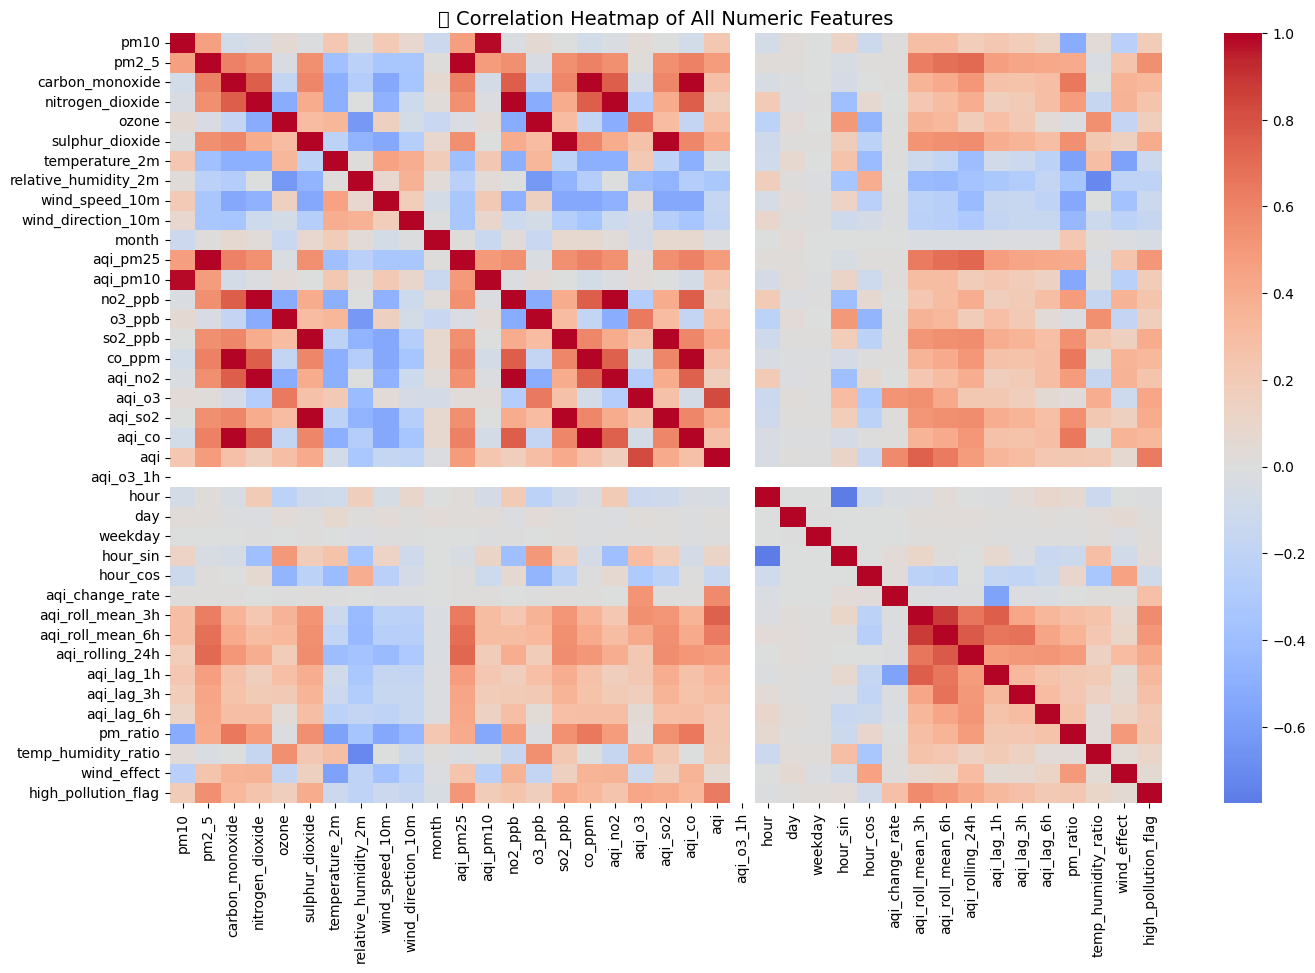

In [5]:
# Correlation Heatmap (for numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols_corr = df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", numeric_cols_corr)
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_cols_corr, cmap="coolwarm", center=0, annot=False)
plt.title("🔍 Correlation Heatmap of All Numeric Features", fontsize=14)
plt.show()

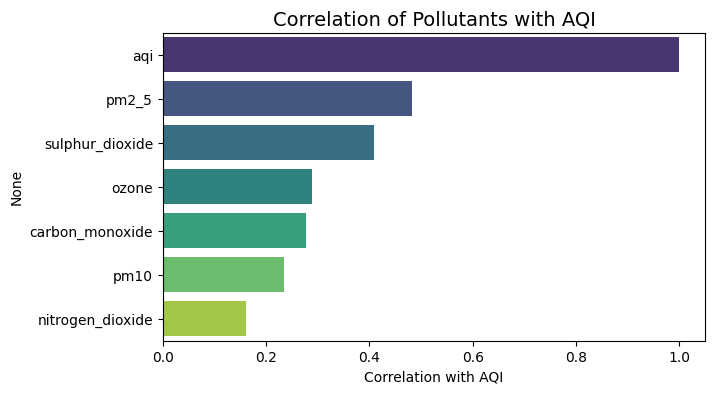

aqi                 1.000000
pm2_5               0.482041
sulphur_dioxide     0.408353
ozone               0.289248
carbon_monoxide     0.277601
pm10                0.235213
nitrogen_dioxide    0.161742
Name: aqi, dtype: float64

In [6]:
# Check correlation of pollutants vs AQI 
pollutants = ['pm10','pm2_5','carbon_monoxide','nitrogen_dioxide','ozone','sulphur_dioxide']
corr_pollutants = df[pollutants + ['aqi']].corr()['aqi'].sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=corr_pollutants.values, y=corr_pollutants.index, palette="viridis", hue=corr_pollutants.index)
plt.title("Correlation of Pollutants with AQI", fontsize=14)
plt.xlabel("Correlation with AQI")
plt.show()

corr_pollutants

3. Temporal Patterns Exploration

📊 Average AQI by Hour:
hour
0      79.89
1      79.98
2      85.20
3      92.61
4      93.23
5      95.32
6     103.41
7     113.45
8     120.41
9     112.29
10    117.02
11    110.13
12    103.06
13     93.18
14     90.41
15     90.05
16     90.51
17     90.46
18     90.16
19     89.94
20     87.79
21     85.12
22     83.14
23     80.70
Name: aqi, dtype: float64

📆 Average AQI by Month:
month
1     125.89
2     100.02
3      92.12
4      86.30
5      76.96
6      80.26
7      89.11
8      74.59
9      72.22
10    101.88
11    112.73
12    117.65
Name: aqi, dtype: float64


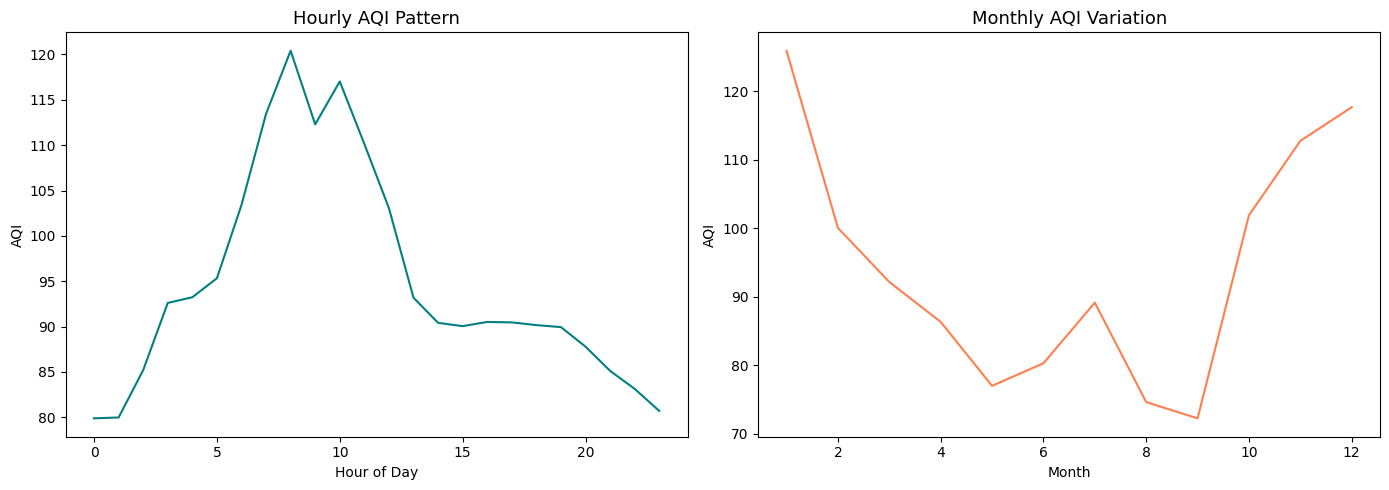

In [7]:
# Time-based pattern exploration
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month

hourly_aqi = df.groupby("hour")["aqi"].mean().round(2)
monthly_aqi = df.groupby("month")["aqi"].mean().round(2)

print("📊 Average AQI by Hour:")
print(hourly_aqi)

print("\n📆 Average AQI by Month:")
print(monthly_aqi)

fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Hourly pattern
sns.lineplot(data=df, x="hour", y="aqi", ax=axes[0], color="teal", errorbar=None)
axes[0].set_title("Hourly AQI Pattern", fontsize=13)
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("AQI")

# Monthly pattern
sns.lineplot(data=df, x="month", y="aqi", ax=axes[1], color="coral", errorbar=None)
axes[1].set_title("Monthly AQI Variation", fontsize=13)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("AQI")

plt.tight_layout()
plt.show()

4. Feature Redundancy Check

In [8]:
# Feature redundancy check
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("🔁 Highly correlated (redundant) features:\n", high_corr_features)

🔁 Highly correlated (redundant) features:
 ['aqi_pm25', 'aqi_pm10', 'no2_ppb', 'o3_ppb', 'so2_ppb', 'co_ppm', 'aqi_no2', 'aqi_so2', 'aqi_co']


5. Low-Variance Check

In [9]:
# Detect low variance or constant features
low_var = df[numeric_cols].nunique()
low_var_features = low_var[low_var == 1].index.tolist()
print("Low variance features (constant or near-constant):", low_var_features)

Low variance features (constant or near-constant): ['aqi_o3_1h']


6. Outlier Visualization

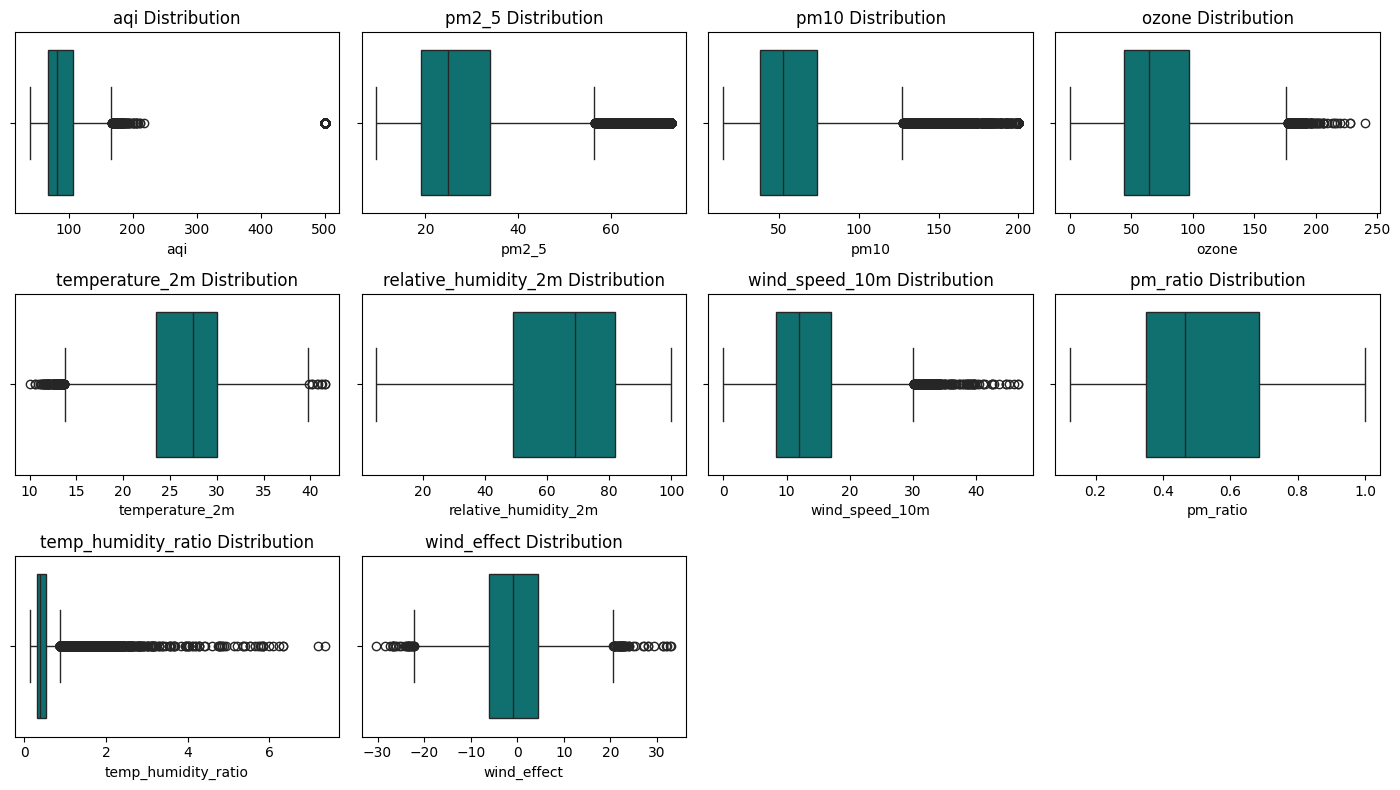

                Feature  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_%
0                   aqi        41.00       500.00            174       0.97
1                 pm2_5         9.40        73.10              0       0.00
2                  pm10        15.00       199.85            180       1.00
3                 ozone         7.00       177.00            320       1.78
4        temperature_2m        14.40        36.00            334       1.86
5  relative_humidity_2m        14.00        96.00            295       1.64
6        wind_speed_10m         2.00        31.80            352       1.96
7              pm_ratio         0.19         0.99            360       2.01
8   temp_humidity_ratio         0.20         2.25            360       2.01
9           wind_effect       -17.24        14.02            360       2.01


In [10]:
# Outlier visualization (key features) 
key_feats = [
    'aqi', 'pm2_5', 'pm10', 'ozone',
    'temperature_2m', 'relative_humidity_2m',
    'wind_speed_10m', 'pm_ratio',
    'temp_humidity_ratio', 'wind_effect'
]
plt.figure(figsize=(14,8))
for i, feat in enumerate(key_feats, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feat], color='teal')
    plt.title(f"{feat} Distribution")
plt.tight_layout()
plt.show()

def outlier_summary_percentile(df, columns, lower_pct=0.01, upper_pct=0.99):
    results = []
    for col in columns:
        lower = df[col].quantile(lower_pct)
        upper = df[col].quantile(upper_pct)
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        count = len(outliers)
        perc = (count / len(df)) * 100
        results.append({
            "Feature": col,
            "Lower_Bound": round(lower, 2),
            "Upper_Bound": round(upper, 2),
            "Outlier_Count": count,
            "Outlier_%": round(perc, 2)
        })
    return pd.DataFrame(results)

key_feats = [
    'aqi', 'pm2_5', 'pm10', 'ozone',
    'temperature_2m', 'relative_humidity_2m',
    'wind_speed_10m', 'pm_ratio',
    'temp_humidity_ratio', 'wind_effect'
]

outlier_table = outlier_summary_percentile(df, key_feats)
print(outlier_table)

7. Drop Irrelavant Features

In [11]:
drop_cols = [
    # Redundant pollutant sub-indices
    'aqi_pm25', 'aqi_pm10', 'no2_ppb', 'o3_ppb', 'so2_ppb', 'co_ppm',
    'aqi_no2', 'aqi_so2', 'aqi_co','aqi_o3',
    
    # Weak correlation or duplication
    'wind_direction_10m', 'hour_cos', 'aqi_o3_1h',
    
    # Redundant time-based features (keep 24h roll & 1h lag only)
    'aqi_roll_mean_3h', 'aqi_roll_mean_6h', 'aqi_lag_3h', 'aqi_lag_6h'
]

df_refined = df.drop(columns=[col for col in drop_cols if col in df.columns])
print("Final shape after dropping:", df_refined.shape)
print("Remaining features:\n", df_refined.columns.tolist())
print(df['datetime'].dtype)

out_path = "../data/final/final_selected_features.csv"
df_refined.to_csv(out_path, index=False)
print(f"✅ Refined dataset saved → {out_path}")

Final shape after dropping: (17952, 23)
Remaining features:
 ['datetime', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'month', 'aqi', 'hour', 'day', 'weekday', 'hour_sin', 'aqi_change_rate', 'aqi_rolling_24h', 'aqi_lag_1h', 'pm_ratio', 'temp_humidity_ratio', 'wind_effect', 'high_pollution_flag']
datetime64[ns]
✅ Refined dataset saved → ../data/final/final_selected_features.csv
